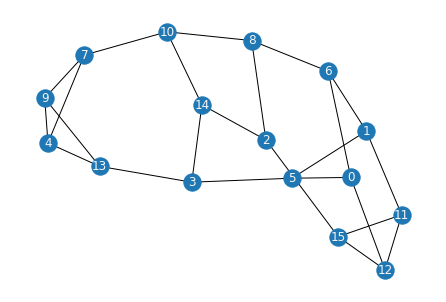

In [8]:
from maxcut_instance_generator import regular_graph

model = regular_graph(num_nodes=16, degree=3, draw=True)

In [9]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1_1 = RandomAccessEncoder(1, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1_1 = qrac_1_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))

(0.75+0j)ZIZIII
(0.75+0j)ZIXIII
(0.75+0j)ZIIIYI
(0.75+0j)XIZIII
(0.75+0j)XIXIII
(0.75+0j)XIIZII
(0.75+0j)YIIIZI
(0.75+0j)YIIYII
(0.75+0j)YIIIIZ
(0.75+0j)IZZIII
(0.75+0j)IZIXII
(0.75+0j)IZIYII
(0.75+0j)IXYIII
(0.75+0j)IXIIXI
(0.75+0j)IXIXII
(0.75+0j)IIXIZI
(0.75+0j)IIYIXI
(0.75+0j)IYYIII
(0.75+0j)IYIIZI
(0.75+0j)IIIXXI
(0.75+0j)IYIYII
(0.75+0j)IIIZYI
(0.75+0j)IIIZIZ
(0.75+0j)IIIIYZ
(-12+0j)IIIIII
None


In [10]:
print(len(qrac_1_1.qubit_to_vertex_map), len(qrac_1_1.calculate_edge_among_qubits(model)))
print(len(qrac_2_1.qubit_to_vertex_map), len(qrac_2_1.calculate_edge_among_qubits(model)))
print(len(qrac_3_1.qubit_to_vertex_map), len(qrac_3_1.calculate_edge_among_qubits(model)))

16 24
9 16
6 11


In [11]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
cost_history_1_1 = []
cost_history_2_1 = []
cost_history_3_1 = []
init_theta_list_1_1 = np.random.random(len(qrac_1_1.qubit_to_vertex_map) * 2 * 3) * 1e-1
init_theta_list_2_1 = np.random.random(len(qrac_2_1.qubit_to_vertex_map) * 2 * 3) * 1e-1
init_theta_list_3_1 = np.random.random(len(qrac_3_1.qubit_to_vertex_map) * 2 * 3) * 1e-1

vqe_1_1 = VQEForQRAO(
    hamiltonian=H_1_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
)
vqe_2_1 = VQEForQRAO(
    hamiltonian=H_2_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
)
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
)

cost_history_1_1.append(vqe_1_1._cost_function(init_theta_list_1_1))
cost_history_2_1.append(vqe_2_1._cost_function(init_theta_list_2_1))
cost_history_3_1.append(vqe_3_1._cost_function(init_theta_list_3_1))

method = "COBYLA"
options = {"disp": True, "maxiter": 25000}

num_iter_1_1 = 1
num_iter_2_1 = 1
num_iter_3_1 = 1

def callback_1_1(x):
    global num_iter_1_1
    cost_val_1_1 = vqe_1_1._cost_function(x) 
    cost_history_1_1.append(cost_val_1_1)
    print(f'{num_iter_1_1}/{options["maxiter"]}\t{cost_val_1_1}')
    num_iter_1_1 += 1

def callback_2_1(x):
    global num_iter_2_1
    cost_val_2_1 = vqe_2_1._cost_function(x) 
    cost_history_2_1.append(cost_val_2_1)
    print(f'{num_iter_2_1}/{options["maxiter"]}\t{cost_val_2_1}')
    num_iter_2_1 += 1

def callback_3_1(x):
    global num_iter_3_1
    cost_val_3_1 = vqe_3_1._cost_function(x) 
    cost_history_3_1.append(cost_val_3_1)
    print(f'{num_iter_3_1}/{options["maxiter"]}\t{cost_val_3_1}')
    num_iter_3_1 += 1

print("Iter\tcost")
opt_1_1 = minimize(
    vqe_1_1._cost_function,
    init_theta_list_1_1,
    method=method,
    options=options,
    callback=callback_1_1,
)

print("Iter\tcost")
opt_2_1 = minimize(
    vqe_2_1._cost_function,
    init_theta_list_2_1,
    method=method,
    options=options,
    callback=callback_2_1,
)

print("Iter\tcost")
opt_3_1 = minimize(
    vqe_3_1._cost_function,
    init_theta_list_3_1,
    method=method,
    options=options,
    callback=callback_3_1,
)

Iter	cost
1/25000	-6.50685136691089
2/25000	-6.46939317812784
3/25000	-6.506851366910889
4/25000	-6.860233366113498
5/25000	-6.856189441763362
6/25000	-6.860233366113494
7/25000	-7.235862755128391
8/25000	-7.22568996989581
9/25000	-7.235862755128393
10/25000	-7.59984065923942
11/25000	-7.588900914907449
12/25000	-7.599840659239422
13/25000	-7.960142539343104
14/25000	-7.95236767217777
15/25000	-7.960142539343105
16/25000	-8.38088244162423
17/25000	-8.368543835302685
18/25000	-8.380882441624234
19/25000	-8.55462688212906
20/25000	-8.554145998463193


/home/s54005/qrao_experiment/.venv/lib/python3.8/site-packages/scipy/optimize/_minimize.py:698: OptimizeWarning: Unknown solver options: gtol
  res = _minimize_cobyla(fun, x0, args, constraints, callback=callback,


21/25000	-8.554626882129062
22/25000	-8.802193637625482
23/25000	-8.790117792527996
24/25000	-8.802193637625482
25/25000	-9.061875745550175
26/25000	-9.054609084020337
27/25000	-9.061875745550175
28/25000	-9.431285389219246
29/25000	-9.408905776775159
30/25000	-9.431285389219246
31/25000	-9.716584234926636
32/25000	-9.702047337919444
33/25000	-9.716584234926637
34/25000	-9.917557628643268
35/25000	-9.904041468569313
36/25000	-9.917557628643266
37/25000	-10.108494270430203
38/25000	-10.099822173303139
39/25000	-10.108494270430205
40/25000	-10.301095853165059
41/25000	-10.298492634054636
42/25000	-10.301095853165055
43/25000	-10.530950053315275
44/25000	-10.529093439698604
45/25000	-10.530950053315273
46/25000	-10.710572224445084
47/25000	-10.707254958443906
48/25000	-10.710572224445086
49/25000	-11.058635445901302
50/25000	-11.058635445901306
51/25000	-10.890800737199015
52/25000	-11.391570794341842
53/25000	-11.391570794341842
54/25000	-11.273798218156697
55/25000	-11.715519889294214
5

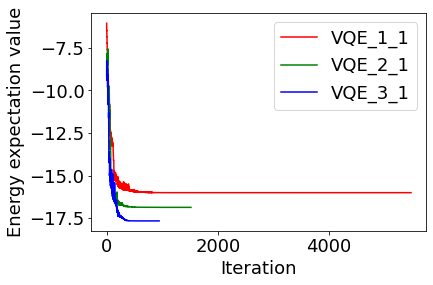

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="VQE_3_1")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [49]:
from qulacs import QuantumCircuit
from qulacs import QuantumState
state = QuantumState(3)
circuit = QuantumCircuit(3)
circuit.add_H_gate(0)

circuit.update_quantum_state(state)

In [52]:
[str(i) for i in state.sampling(10)]

[1, 1, 0, 1, 1, 0, 0, 0, 0, 1]